In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_curve,recall_score,precision_score,f1_score,auc,confusion_matrix





import cv2
import pathlib
import PIL
import PIL.Image

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,BatchNormalization,Flatten,Conv2D,MaxPooling2D,MaxPool2D,GlobalMaxPooling2D
from tensorflow.keras.optimizers import SGD,RMSprop,Adam
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau



tf.__version__

'2.4.1'

In [2]:
seed = 123
np.random.seed(seed)

# Import the data. Analyse the dimensions of the data. Visualise the data

In [3]:
ROOT_PATH = "D:\\01_BALAJI\\01_MLAI\\MLAI\\11_ComputerVision\\Assignment"

In [4]:
train_path = os.path.join(ROOT_PATH,"Part1_data","train")
image_list = []
label_list = []
label = []
image_count = []
for class_folder_name in os.listdir(train_path):
    label.append(class_folder_name)
    count = 0
    for file_name_list in os.listdir(os.path.join(ROOT_PATH,"Part1_data","train",class_folder_name)):        
        image_3channel = cv2.imread(os.path.join(train_path,class_folder_name,file_name_list),cv2.IMREAD_COLOR)
        if image_3channel is None:
            print("Missing -- ",os.path.join(train_path,class_folder_name,file_name_list) )
        else:
            count = count + 1
            image_list.append(image_3channel)
            label_list.append(class_folder_name)
    image_count.append(count)      

Missing --  D:\01_BALAJI\01_MLAI\MLAI\11_ComputerVision\Assignment\Part1_data\train\Black-grass\.ipynb_checkpoints
Missing --  D:\01_BALAJI\01_MLAI\MLAI\11_ComputerVision\Assignment\Part1_data\train\Charlock\.ipynb_checkpoints
Missing --  D:\01_BALAJI\01_MLAI\MLAI\11_ComputerVision\Assignment\Part1_data\train\Loose Silky-bent\.ipynb_checkpoints
Missing --  D:\01_BALAJI\01_MLAI\MLAI\11_ComputerVision\Assignment\Part1_data\train\Small-flowered Cranesbill\.ipynb_checkpoints


Total image count  4767


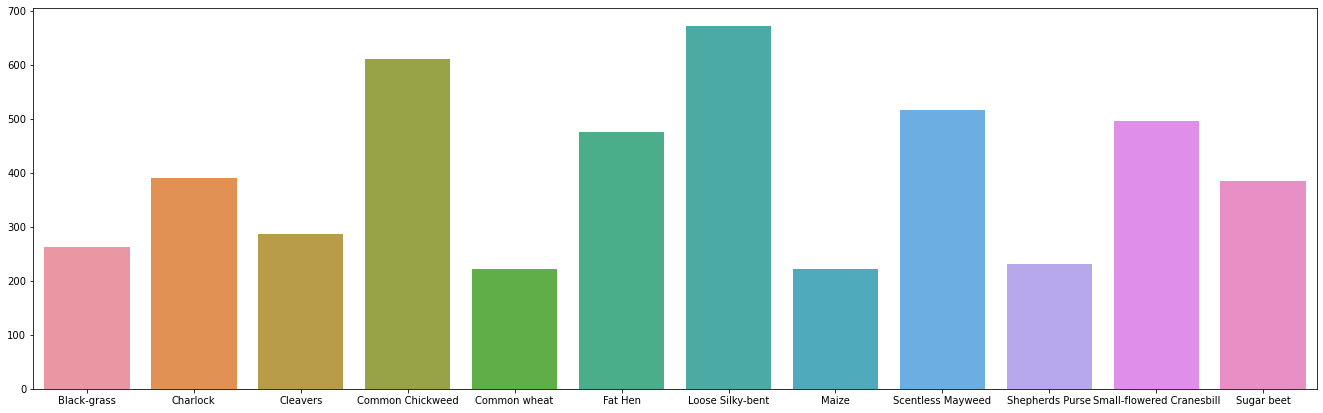

In [5]:
print("Total image count ",len(image_list))

fig, ax = plt.subplots(figsize=(23,7))
sns.barplot(x=label,y=image_count)

In [6]:
print(image_list[0].dtype)
print("Shape of the image ", image_list[0].shape)
img_height = 125
img_width = 125

# resizing the image 125 * 125
images_reshaped = [cv2.resize(img,(img_width,img_height), interpolation = cv2.INTER_AREA) for img in image_list]
print("Shape of the image after resizing", images_reshaped[0].shape)

uint8
Shape of the image  (196, 196, 3)
Shape of the image after resizing (125, 125, 3)


### Visualise the data

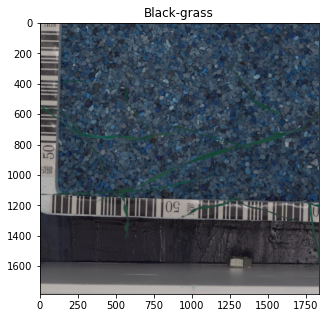

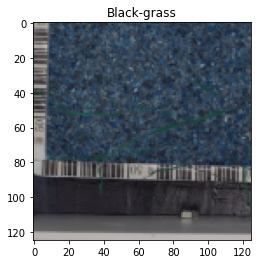

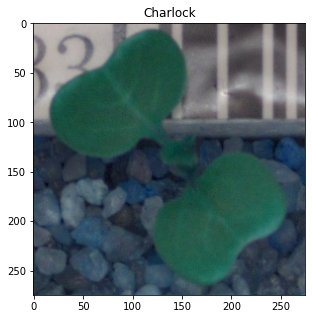

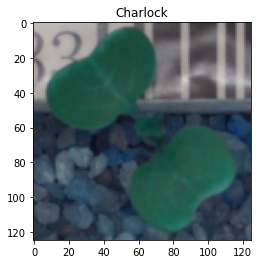

In [7]:
# Visualise resized and original image
plt.figure(figsize=(5, 5))
plt.imshow(image_list[10])
plt.title(label_list[10])
plt.show()

plt.imshow(images_reshaped[10])
plt.title(label_list[10])
plt.show()

plt.figure(figsize=(5, 5))
plt.imshow(image_list[450])
plt.title(label_list[450])
plt.show()

plt.imshow(images_reshaped[450])
plt.title(label_list[450])
plt.show()

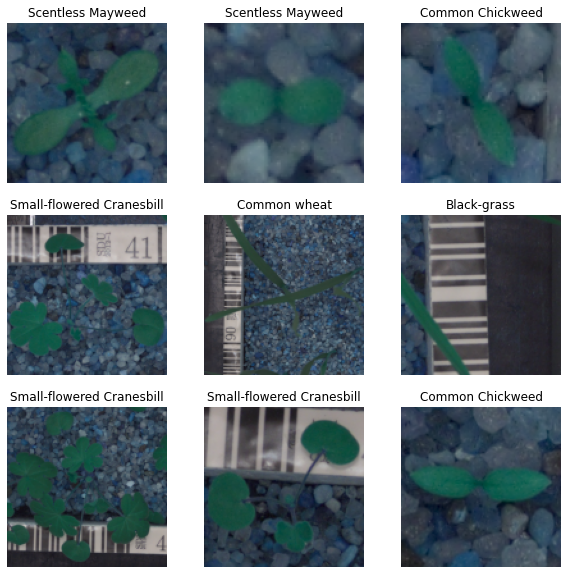

In [8]:
# Visualize the image 
plt.figure(figsize=(10, 10))
for i in range(9):
    index = np.random.randint(0,4767)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images_reshaped[index])
    plt.title(label_list[index])
    plt.axis("off")

# Train and Test data split

In [9]:
# Encoding the label
enc = LabelBinarizer()
label_list_encoding = enc.fit_transform(label_list)
for i in range(9):
    index = np.random.randint(0,4767)
    print(label_list_encoding[index],"--->",label_list[index])

[1 0 0 0 0 0 0 0 0 0 0 0] ---> Black-grass
[0 0 0 0 0 0 0 0 1 0 0 0] ---> Scentless Mayweed
[0 0 0 1 0 0 0 0 0 0 0 0] ---> Common Chickweed
[0 0 0 0 0 0 1 0 0 0 0 0] ---> Loose Silky-bent
[0 0 0 0 0 0 0 0 1 0 0 0] ---> Scentless Mayweed
[0 0 0 1 0 0 0 0 0 0 0 0] ---> Common Chickweed
[0 0 0 0 0 1 0 0 0 0 0 0] ---> Fat Hen
[0 0 0 0 0 0 0 0 0 0 0 1] ---> Sugar beet
[0 0 0 0 0 1 0 0 0 0 0 0] ---> Fat Hen


In [10]:
# data split
X_train, X_test, y_train, y_test = train_test_split(np.array(images_reshaped), label_list_encoding, test_size=0.3, random_state=123)

In [11]:


## Normalize 
X_train = X_train /  255
X_test = X_test /  255

print("X_train min / max ", X_train.min(),X_train.max())
print("X_test min / max ", X_test.min(),X_test.max())

X_train_svc = X_train.reshape(X_train.shape[0],3*img_width*img_height)
print("X_train_svc data shape ", X_train_svc.shape)

X_test_svc= X_test.reshape(X_test.shape[0],3*img_width*img_height)
print("X_train_svc data shape ", X_test_svc.shape)

y_train_svc = y_train.argmax(axis=1)
print("y_train_svc data shape ", y_train_svc.shape)

y_test_svc = y_test.argmax(axis=1)
print("y_test_svc data shape ", y_test_svc.shape)


print("X_train data shape ", X_train.shape)
print("y_train data shape ", y_train.shape)

print("X_test data shape ", X_test.shape)
print("y_test data shape ", y_test.shape)


X_train min / max  0.0 1.0
X_test min / max  0.0 1.0
X_train_svc data shape  (3336, 46875)
X_train_svc data shape  (1431, 46875)
y_train_svc data shape  (3336,)
y_test_svc data shape  (1431,)
X_train data shape  (3336, 125, 125, 3)
y_train data shape  (3336, 12)
X_test data shape  (1431, 125, 125, 3)
y_test data shape  (1431, 12)


# SVC

In [ ]:
%%time
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train_svc),
                                                y_train_svc)
class_weights_dict = dict(zip(np.unique(y_train_svc), class_weights))

pca = PCA(0.95)
estimator = SVC(kernel="rbf",class_weight = class_weights_dict)
param_grid = {}
pipe = Pipeline(steps=[('pca', pca), ('estimator', estimator)])
gridsearch = GridSearchCV(pipe, param_grid, n_jobs=-1)



gridsearch.fit(X_train_svc,y_train_svc)
y_predict = gridsearch.predict(X_test_svc)

In [ ]:
# %%time
# pca = PCA(0.95)
# pipe = Pipeline(steps=[('pca', pca), ('estimator', KNeighborsClassifier())])

# param_grid = {
#     'estimator__n_neighbors': [1,5,7,11]
# }

# gridsearch = GridSearchCV(pipe, param_grid, n_jobs=-1)
# gridsearch.fit(X_train_svc,y_train_svc)
# print(gridsearch.best_params_)
# print(gridsearch.best_score_)
# y_predict = gridsearch.predict(X_test_svc)

train_score 0.88
test_score 0.47


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 <a list of 12 Text major ticklabel objects>)

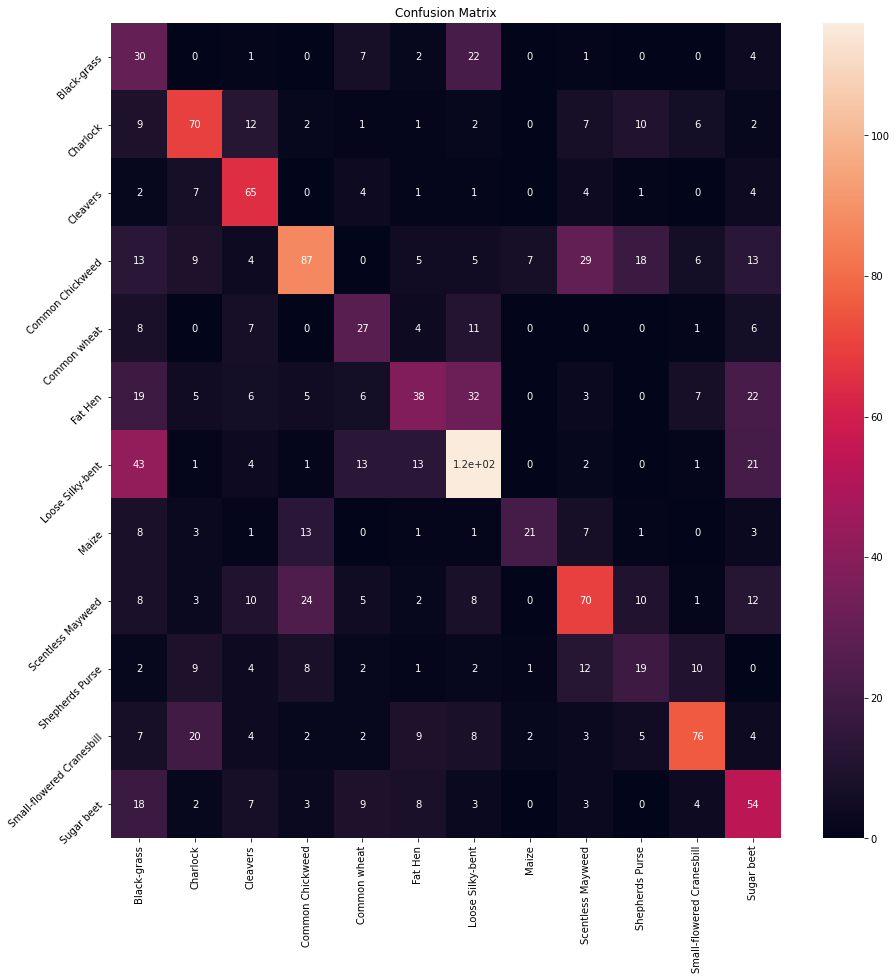

In [165]:
print("train_score" , round(gridsearch.score(X_train_svc,y_train_svc),2))
print("test_score", round(gridsearch.score(X_test_svc,y_test_svc),2))


np.set_printoptions(precision=3)
fig, ax = plt.subplots(figsize=(15,15))
cm = confusion_matrix(y_test_svc,y_predict)
sns.heatmap(cm, annot=True, ax=ax)
ax.set_title('Confusion Matrix'); 
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(enc.classes_)
ax.yaxis.set_ticklabels(enc.classes_)
plt.yticks(rotation=45)

## Neural Network

In [66]:


def nn_model_dropout(kernel_initializer = "normal"):
    model = Sequential()
    model.add(Flatten())
    model.add(Dense(216, activation = "relu"))   
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    model.add(Dense(64, activation = "relu"))   
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    model.add(Dense(12, activation = "softmax"))
    return model


model_drop = nn_model_dropout(kernel_initializer="normal")
optimizer = SGD(lr=0.001, momentum=0.9)

es = EarlyStopping(monitor='val_loss', patience=10,min_delta=0.05)
model_drop.compile(optimizer = optimizer, loss = 'categorical_crossentropy', 
                   metrics = ["accuracy"])

learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.0001)

class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train.argmax(axis=1)),
                                                 y_train.argmax(axis=1))
class_weights_dict = dict(zip(np.unique(y_train.argmax(axis=1)), class_weights))
print(class_weights_dict)

fit_data = model_drop.fit(X_train, y_train, validation_data=(X_test,y_test),
                           batch_size = 32, epochs = 100, verbose = 1,callbacks=[es,learning_rate_reduction],class_weight = class_weights_dict)

{0: 1.4183673469387754, 1: 1.037313432835821, 2: 1.404040404040404, 3: 0.6698795180722892, 4: 1.7707006369426752, 5: 0.8373493975903614, 6: 0.6096491228070176, 7: 1.7160493827160495, 8: 0.7658402203856749, 9: 1.7267080745341614, 10: 0.7853107344632768, 11: 1.0145985401459854}
Epoch 1/100
105/105 [==============================] - 9s 73ms/step - loss: 2.8380 - accuracy: 0.1301 - val_loss: 3.9455 - val_accuracy: 0.0797
Epoch 2/100
105/105 [==============================] - 6s 62ms/step - loss: 1.9749 - accuracy: 0.2972 - val_loss: 2.2493 - val_accuracy: 0.3075
Epoch 3/100
105/105 [==============================] - 7s 70ms/step - loss: 1.6649 - accuracy: 0.4422 - val_loss: 2.1950 - val_accuracy: 0.2166
Epoch 4/100
105/105 [==============================] - 8s 72ms/step - loss: 1.4720 - accuracy: 0.4985 - val_loss: 2.8247 - val_accuracy: 0.1957
Epoch 5/100
105/105 [==============================] - 7s 70ms/step - loss: 1.3310 - accuracy: 0.5416 - val_loss: 2.5121 - val_accuracy: 0.2607
Epo

In [67]:
model_drop.evaluate(X_test, y_test)

45/45 [==============================] - 1s 18ms/step - loss: 1.7179 - accuracy: 0.4256


[1.7178775072097778, 0.42557650804519653]

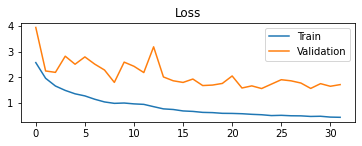

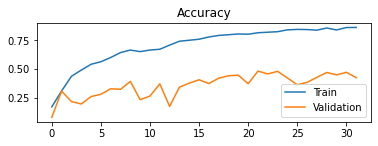

In [68]:
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(fit_data.history['loss'],label="Train")
plt.plot(fit_data.history['val_loss'],label="Validation")
plt.legend()
plt.show()

# plot loss during training
plt.subplot(211)
plt.title('Accuracy')
plt.plot(fit_data.history['accuracy'],label="Train")
plt.plot(fit_data.history['val_accuracy'],label="Validation")

plt.legend()
plt.show()

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 <a list of 12 Text major ticklabel objects>)

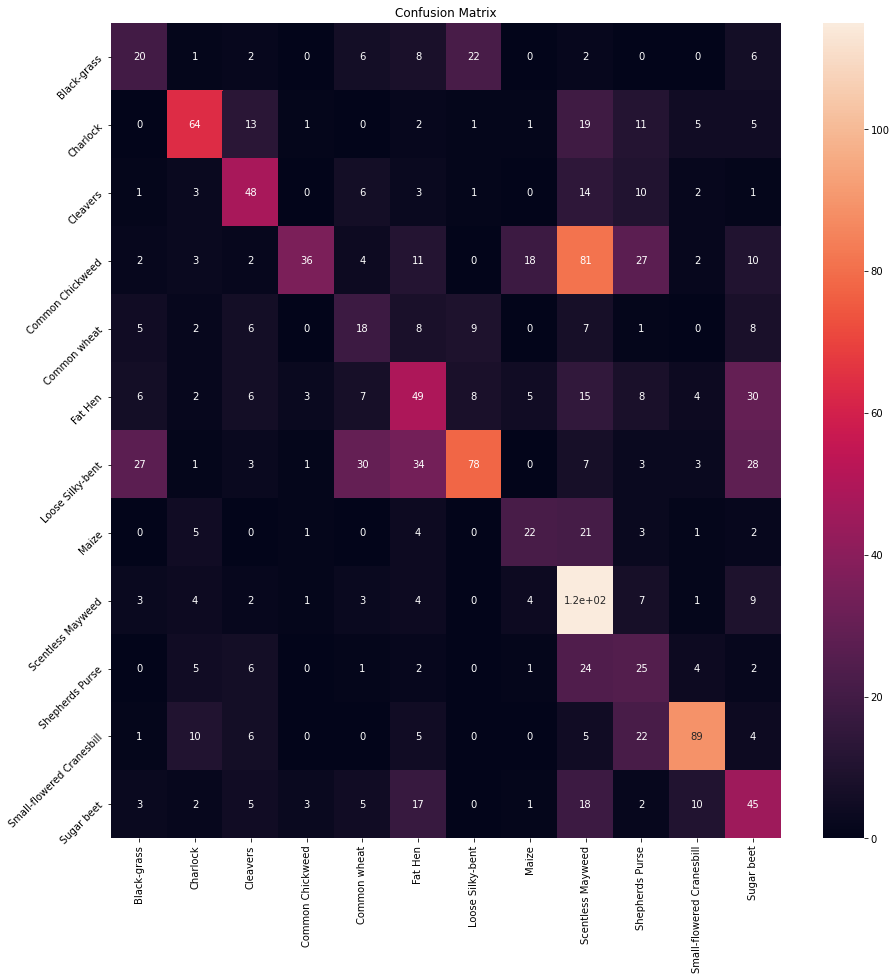

In [69]:
y_predict = model_drop.predict_classes(X_test)

np.set_printoptions(precision=3)
fig, ax = plt.subplots(figsize=(15,15))
cm = confusion_matrix(y_test_svc,y_predict)
sns.heatmap(cm, annot=True, ax=ax)
ax.set_title('Confusion Matrix'); 
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(enc.classes_)
ax.yaxis.set_ticklabels(enc.classes_)
plt.yticks(rotation=45)

# CNN layer

In [27]:
#The idea is to alter the training data with small transformations
datagen = ImageDataGenerator(
        shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
        

datagen.fit(X_train)

In [28]:
X_train.shape

(3336, 125, 125, 3)

In [30]:
def cnn_model():
    model = Sequential()

    # Add a Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
    model.add(Conv2D(32, (3, 3), input_shape = (img_width, img_height, 3), activation = 'relu', padding = 'same'))

    # Add a Max Pooling layer of size 2X2
    model.add(MaxPooling2D(pool_size = (2, 2)))

    # Add another Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
    model.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))

    # Adding another pooling layer
    model.add(MaxPooling2D(pool_size = (2, 2)))

    # Add another Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
    model.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))

    # Adding another pooling layer
    model.add(MaxPooling2D(pool_size = (2, 2)))

    model.add(Flatten())
    model.add(Dense(216, activation = "relu"))   
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    model.add(Dense(64, activation = "relu"))   
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    model.add(Dense(12, activation = "softmax"))
    return model


cnn_model = cnn_model()
optimizer = SGD(learning_rate=0.001,momentum=0.9)
cnn_model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train.argmax(axis=1)),
                                                 y_train.argmax(axis=1))
class_weights_dict = dict(zip(np.unique(y_train.argmax(axis=1)), class_weights))

es = EarlyStopping(monitor='val_loss', patience=5,min_delta=0.01)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.0001)

cnn_fit_data = cnn_model.fit_generator(datagen.flow(X_train,y_train, batch_size=32),
                              epochs = 500, validation_data = (X_test,y_test)
                                       ,steps_per_epoch = int(3336/32)
                                       ,validation_steps = int(1431/32)                                       
                              ,callbacks=[es,learning_rate_reduction])



Epoch 1/500
104/104 [==============================] - 68s 608ms/step - loss: 2.9606 - accuracy: 0.1285 - val_loss: 2.4185 - val_accuracy: 0.1726
Epoch 2/500
104/104 [==============================] - 59s 560ms/step - loss: 1.7445 - accuracy: 0.4089 - val_loss: 2.2488 - val_accuracy: 0.1824
Epoch 3/500
104/104 [==============================] - 58s 560ms/step - loss: 1.4844 - accuracy: 0.5089 - val_loss: 2.1238 - val_accuracy: 0.3082
Epoch 4/500
104/104 [==============================] - 58s 555ms/step - loss: 1.3030 - accuracy: 0.5771 - val_loss: 2.0327 - val_accuracy: 0.2732
Epoch 5/500
104/104 [==============================] - 58s 556ms/step - loss: 1.2178 - accuracy: 0.5976 - val_loss: 2.0193 - val_accuracy: 0.4312
Epoch 6/500
104/104 [==============================] - 58s 552ms/step - loss: 1.1375 - accuracy: 0.6258 - val_loss: 1.7549 - val_accuracy: 0.3878
Epoch 7/500
104/104 [==============================] - 58s 556ms/step - loss: 1.0769 - accuracy: 0.6419 - val_loss: 3.1200 -

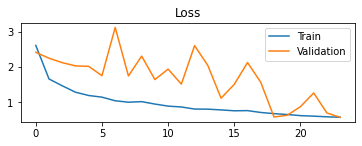

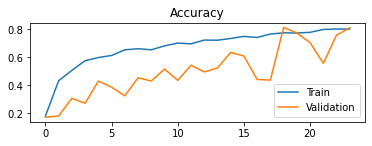

In [35]:
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(cnn_fit_data.history['loss'],label="Train")
plt.plot(cnn_fit_data.history['val_loss'],label="Validation")
plt.legend()
plt.show()

# plot loss during training
plt.subplot(211)
plt.title('Accuracy')
plt.plot(cnn_fit_data.history['accuracy'],label="Train")
plt.plot(cnn_fit_data.history['val_accuracy'],label="Validation")

plt.legend()
plt.show()

In [63]:
y_test_svc 

array([ 0,  6,  8, ..., 10,  5, 11], dtype=int64)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 <a list of 12 Text major ticklabel objects>)

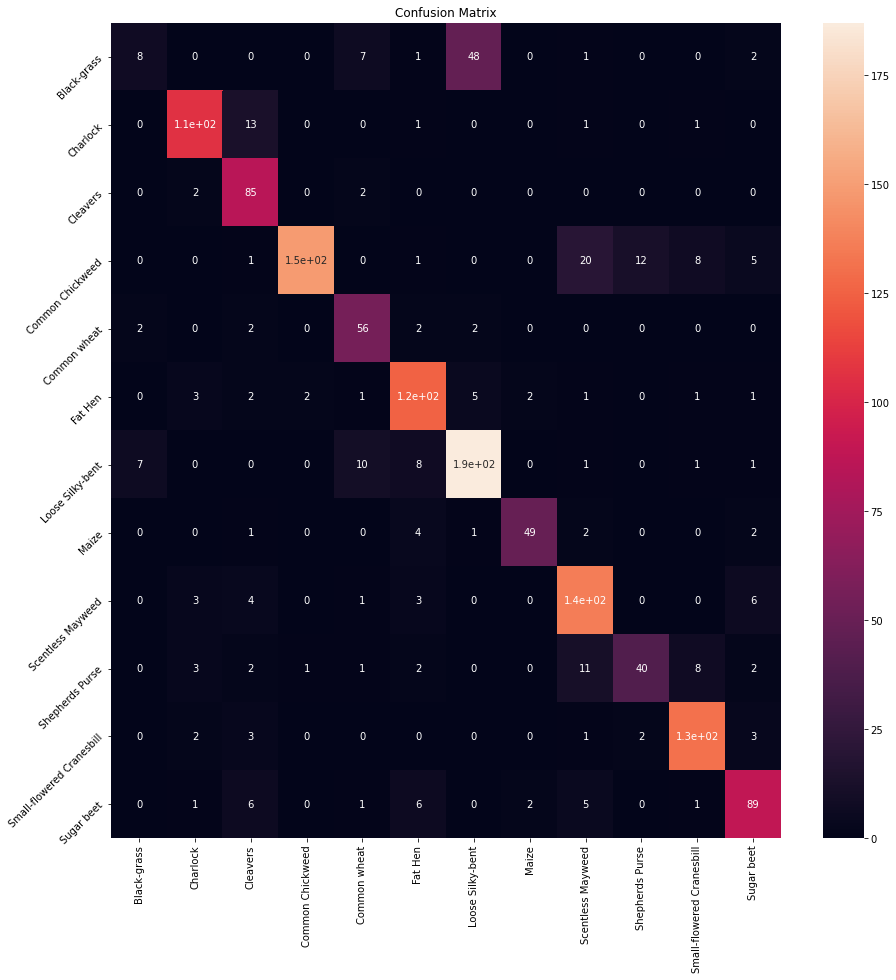

In [64]:
y_predict = cnn_model.predict_classes(X_test)

np.set_printoptions(precision=3)
fig, ax = plt.subplots(figsize=(15,15))
cm = confusion_matrix(y_test_svc,y_predict)
sns.heatmap(cm, annot=True, ax=ax)
ax.set_title('Confusion Matrix'); 
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(enc.classes_)
ax.yaxis.set_ticklabels(enc.classes_)
plt.yticks(rotation=45)

## Model summary

In [61]:
cnn_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 125, 125, 32)      896       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 62, 62, 32)        9248      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 31, 31, 32)        9248      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 7200)             

# Saving the model

In [36]:
cnn_model.save('./Plant_Seedlings_model.h5')
cnn_model.save_weights('./Plant_Seedlings_weights.h5')

# Testing the Model

In [38]:
from tensorflow.keras.models import load_model

pretrained_model = load_model('./Plant_Seedlings_model.h5')
pretrained_model.load_weights('./Plant_Seedlings_weights.h5')

(578, 578, 3)
(125, 125, 3)
(125, 125, 3)


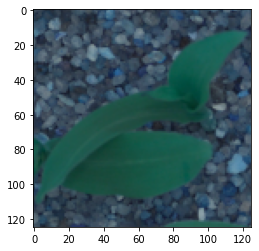

In [59]:
test_image = cv2.imread('./Part1_data/Seedling - Prediction/Predict.png')
print(test_image.shape)
test_image = cv2.resize(test_image,(img_width,img_height), interpolation = cv2.INTER_AREA)
print(test_image.shape)
plt.imshow(test_image)

test_image_expanded = np.expand_dims(test_image, axis = 0)
print(test_image.shape)

test_image_expanded =test_image_expanded*1/255.0

Text(0.5, 1.0, 'Maize')

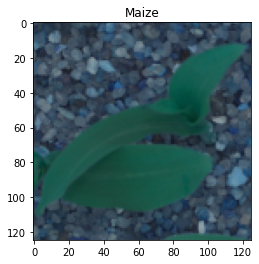

In [60]:
result = pretrained_model.predict_classes(test_image_expanded)


plt.imshow(test_image)
plt.title(label[result[0]])

Observation :
 - NN and SVC models are overfitting and has the test accuracy less than 40%
 - CNN  performs good with the train accuracy = 79% and test accuracy of 81% and was able to predict the test image correctely as "Maize"
 